In [1]:
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Reading all the csv files and concating them in one single dataframe
dir_name = "dataset\\"
glued_data = pd.DataFrame()
for file_name in glob.glob(dir_name+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [3]:
glued_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
glued_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [5]:
glued_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
glued_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
(glued_data.isnull().sum().sum()/glued_data.shape[0])*100

1.75006689858175

In [8]:
frame = glued_data.dropna()
frame.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
frame[frame['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
df_filtered = frame[frame['Quantity Ordered'] != "Quantity Ordered"]
df_filtered.shape

(185950, 6)

In [11]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
df_filtered['Order Date'] = pd.to_datetime(df_filtered['Order Date'])
df_filtered["Quantity Ordered"]=df_filtered["Quantity Ordered"].astype("float")
df_filtered["Price Each"]=df_filtered["Price Each"].astype("float")

# Creating Sales Column By multiplying Quantity Ordered and Price of Each Product
df_filtered["Sales"]=df_filtered["Quantity Ordered"]*df_filtered["Price Each"]

C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [13]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


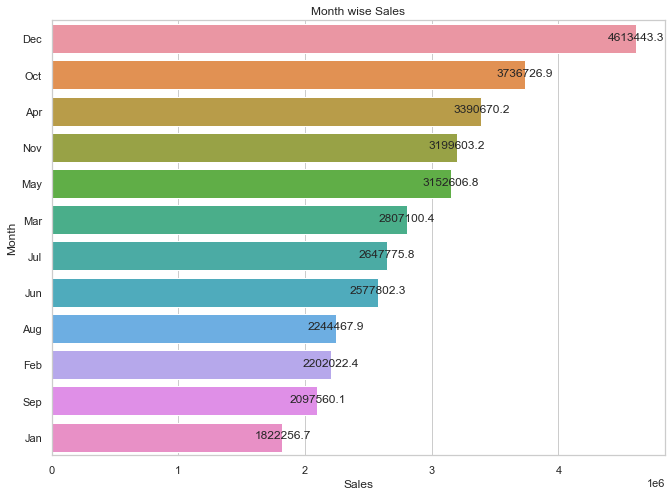

In [20]:
df_filtered['Month'] = df_filtered['Order Date'].dt.strftime('%b')

df_sales_month = df_filtered.groupby(['Month']).Sales.sum()
df_sales_month = df_sales_month.reset_index()
df_sales_month = df_sales_month.sort_values('Sales', ascending=False)

fig, ax = plt.subplots(figsize = (11, 8))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = "Sales",
           y = "Month",
           data = df_sales_month)
for p in g.patches:
    g.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y()+0.6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Month wise Sales")
plt.show()

C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


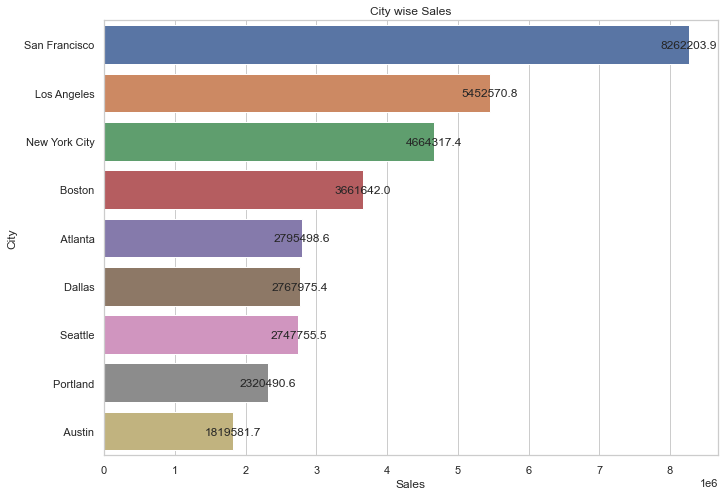

In [15]:
df_sales_city = df_filtered
list_city = []
for i in df_sales_city['Purchase Address']:
    list_city.append(i.split(",")[1])
df_sales_city['City'] = list_city

df_sales_city2 = df_sales_city.groupby(['City']).Sales.sum()
df_sales_city2 = df_sales_city2.reset_index()
df_sales_city2 = df_sales_city2.sort_values('Sales', ascending=False)

fig, ax = plt.subplots(figsize = (11, 8))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = "Sales",
           y = "City",
           data = df_sales_city2)
for p in g.patches:
    g.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y()+0.6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("City wise Sales")
plt.show()

In [16]:
df_p = df_filtered.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).to_frame().reset_index()

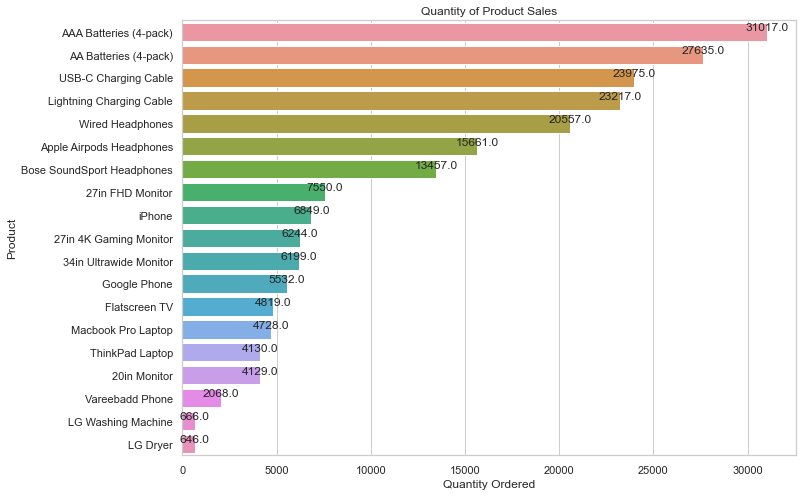

In [17]:
fig, ax = plt.subplots(figsize = (11, 8))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = "Quantity Ordered",
           y = "Product",
           data = df_p)
for p in g.patches:
    g.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y()+0.6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Quantity of Product Sales")
plt.show()

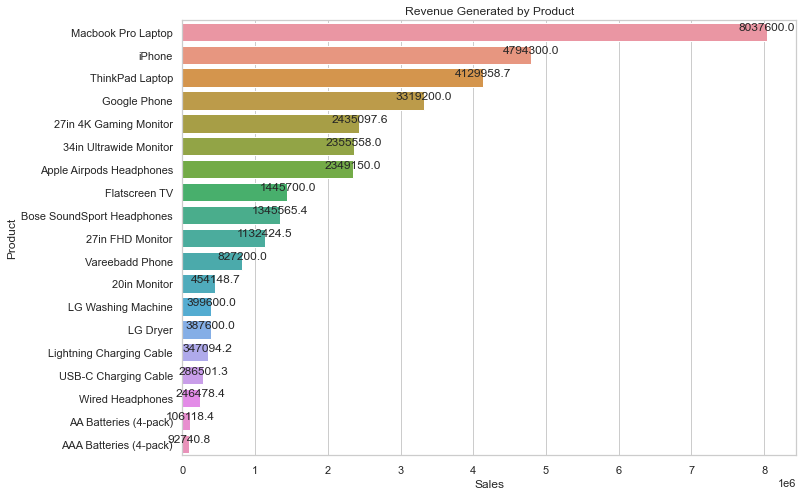

In [18]:
df_s = df_filtered.groupby('Product')['Sales'].sum().sort_values(ascending=False).to_frame().reset_index()

fig, ax = plt.subplots(figsize = (11, 8))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = "Sales",
           y = "Product",
           data = df_s)
for p in g.patches:
    g.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y()+0.6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Revenue Generated by Product")
plt.show()

C:\Users\pmodi\Anaconda3\envs\regime\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


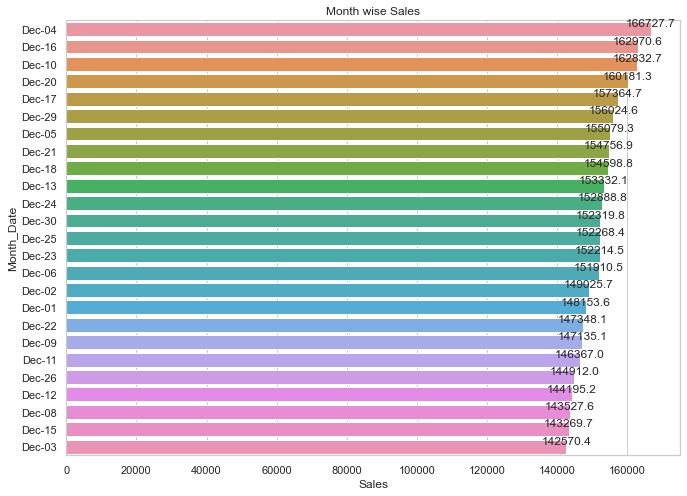

In [27]:
df_filtered['Month_Date'] = df_filtered['Order Date'].dt.strftime('%b-%d')

df_sales_md = df_filtered.groupby(['Month_Date']).Sales.sum()
df_sales_md = df_sales_md.reset_index()
df_sales_md = df_sales_md.sort_values('Sales', ascending=False)
df_sales_md = df_sales_md.head(25)

fig, ax = plt.subplots(figsize = (11, 8))
sns.set_theme(style="whitegrid")
g = sns.barplot(x = "Sales",
           y = "Month_Date",
           data = df_sales_md)
for p in g.patches:
    g.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width(), p.get_y()+0.6), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Month wise Sales")
plt.show()